In [1]:
!pip install xgboost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
import xgboost
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel(r'C:\Users\dell\Downloads\Final_Train.xlsx')
train.head(20)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [3]:
test=pd.read_excel(r'C:\Users\dell\Downloads\Final_Test.xlsx')
test.head(30)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore"
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN


In [4]:
test['Fees']=np.nan

In [5]:
train.shape

(5961, 7)

In [6]:
train=pd.concat([train,test],axis=0)

In [7]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [8]:
train['experience']=train.Experience.str.extract('(\d+)')

In [9]:
train.Place.value_counts()

HSR Layout, Bangalore             97
Andheri West, Mumbai              97
Dwarka, Delhi                     93
Banjara Hills, Hyderabad          85
Mulund West, Mumbai               81
                                  ..
Sindhi Colony, Hyderabad           1
Indirapuram, Delhi                 1
Hyder Nagar, Hyderabad             1
Thonnakkal, Thiruvananthapuram     1
Ernakulam, Ernakulam               1
Name: Place, Length: 948, dtype: int64

In [10]:
train['place']=train.Place.str.extract(',\s([a-zA-Z]*)$')

In [11]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai


In [12]:
train.Rating.value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
92%      95
90%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
79%      15
81%      15
76%      13
73%      13
60%      11
70%       8
75%       8
78%       7
74%       7
69%       6
55%       5
56%       5
68%       5
64%       4
57%       3
72%       3
65%       2
33%       2
62%       2
53%       2
63%       2
36%       1
48%       1
45%       1
40%       1
58%       1
47%       1
7%        1
52%       1
Name: Rating, dtype: int64

In [13]:
train['rating']=train.Rating.str.extract('(\d+)')

In [14]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100


In [15]:
x=np.where(train.Qualification.str.contains('(MBBS|BDS|MD|MS|LCEH|DDVL|BAMS|BSAM|BHMS|DHMS|DNB|Get inspired)')==False)

In [16]:
for i in x:
    print(train.iloc[i,:].Qualification)

104     PhD - Orthodontics & Dentofacial Orthopaedics,...
224                                                  GCEH
753                                   39 years experience
829     Diplomate of National Board Exam, Diploma in O...
1030                 Diploma in Otorhinolaryngology (DLO)
1064              GCEH, Certificate in Child Health (CCH)
1265                               Diploma in Dermatology
1297                                              G.A.M.S
2005                                              G.A.M.S
2035    Fellowship in Oral implantlogy, Certified Adva...
2975                                           M.D. (E.H)
4503                                                  DDV
4757    Diploma in Otorhinolaryngology (DLO), Diploma ...
5182                                              G.A.M.S
443                                FRCS - General Surgery
471                                            FWFO, FPFA
1139                               Diploma in Dermatology
1159          

In [17]:
train['MBBS']=train.Qualification.str.extract('(MBBS)')
train['BDS']=train.Qualification.str.extract('(BDS)')
train['MD']=train.Qualification.str.extract('(MD)')
train['MS']=train.Qualification.str.extract('(MS)')
train['LCEH']=train.Qualification.str.extract('(LCEH)')
train['DDVL']=train.Qualification.str.extract('(DDVL)')
train['BAMS']=train.Qualification.str.extract('(BAMS)')
train['BSAM']=train.Qualification.str.extract('(BSAM)')
train['BHMS']=train.Qualification.str.extract('(BHMS)')
train['DHMS']=train.Qualification.str.extract('(DHMS)')
train['DNB']=train.Qualification.str.extract('(DNB)')
train['Get']=train.Qualification.str.extract('(Get inspired)')


In [18]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'experience', 'place', 'rating', 'MBBS',
       'BDS', 'MD', 'MS', 'LCEH', 'DDVL', 'BAMS', 'BSAM', 'BHMS', 'DHMS',
       'DNB', 'Get'],
      dtype='object')

In [19]:
train.iloc[:,10:22]=train.iloc[:,10:22].fillna(0)

In [20]:
train.iloc[:,10:22]=train.iloc[:,10:22].replace({'MBBS':1,
       'BDS':1,'MD':1,'MS':1,'LCEH':1,'DDVL':1,'BAMS':1,'BSAM':1,'BHMS':1,'DHMS':1,
       'DNB':1,'Get':1})

In [21]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating,...,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100,...,1,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98,...,1,1,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN,...,0,1,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore,NaN,...,0,1,0,0,1,0,0,0,0,0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100,...,0,1,0,0,1,0,0,0,0,0


In [22]:
attributes = ['Profile', 'Fees' , 'experience','place','rating','MBBS','BDS','MD','MS','LCEH','DDVL',
              'BAMS','BSAM','BHMS','DHMS','DNB','Get']

In [23]:
train=train[attributes]

In [24]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Profile     7948 non-null   object 
 1   Fees        5961 non-null   float64
 2   experience  7948 non-null   object 
 3   place       7916 non-null   object 
 4   rating      3556 non-null   object 
 5   MBBS        7948 non-null   int64  
 6   BDS         7948 non-null   int64  
 7   MD          7948 non-null   int64  
 8   MS          7948 non-null   int64  
 9   LCEH        7948 non-null   int64  
 10  DDVL        7948 non-null   int64  
 11  BAMS        7948 non-null   int64  
 12  BSAM        7948 non-null   int64  
 13  BHMS        7948 non-null   int64  
 14  DHMS        7948 non-null   int64  
 15  DNB         7948 non-null   int64  
 16  Get         7948 non-null   object 
dtypes: float64(1), int64(11), object(5)
memory usage: 1.1+ MB


In [26]:
train.describe()

,Fees,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB
count,5961.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,307.944640,0.476095,0.225214,0.386638,0.362481,0.002768,0.028686,0.126447,0.001258,0.125315,0.008178,0.070710
std,190.920373,0.499460,0.417749,0.487010,0.480747,0.052542,0.166934,0.332373,0.035451,0.331096,0.090068,0.256355
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,500.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
train.isnull().sum()

Profile          0
Fees          1987
experience       0
place           32
rating        4392
MBBS             0
BDS              0
MD               0
MS               0
LCEH             0
DDVL             0
BAMS             0
BSAM             0
BHMS             0
DHMS             0
DNB              0
Get              0
dtype: int64

In [28]:
train['Fees'] = train['Fees'].fillna(0)
train['place'] = train['place'].fillna(0)
train['rating'] = train['rating'].fillna(0)

In [29]:
train.isnull().sum()

Profile       0
Fees          0
experience    0
place         0
rating        0
MBBS          0
BDS           0
MD            0
MS            0
LCEH          0
DDVL          0
BAMS          0
BSAM          0
BHMS          0
DHMS          0
DNB           0
Get           0
dtype: int64

In [30]:
corr_mat=train.corr()

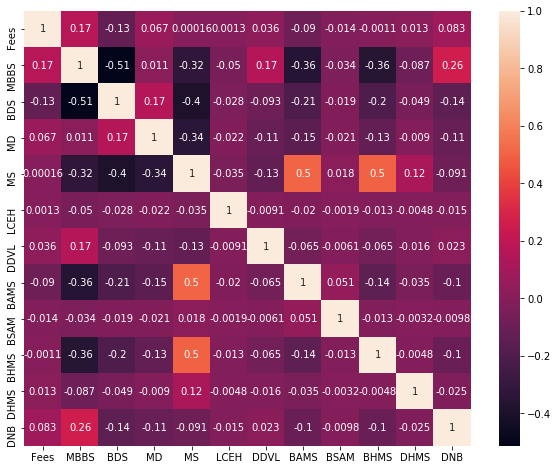

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True)

In [32]:
corr_mat['Fees'].sort_values(ascending=False)

Fees    1.000000
MBBS    0.170544
DNB     0.083147
MD      0.066670
DDVL    0.035989
DHMS    0.013074
LCEH    0.001341
MS      0.000156
BHMS   -0.001084
BSAM   -0.014364
BAMS   -0.090211
BDS    -0.126068
Name: Fees, dtype: float64

In [33]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,0,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,0,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [34]:
train.Profile=train.Profile.astype('category')

In [35]:
train.experience.value_counts()

9     419
10    404
8     380
11    374
12    358
     ... 
60      1
58      1
64      1
61      1
66      1
Name: experience, Length: 64, dtype: int64

In [36]:
train.experience=train.experience.astype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D6C725048>]],
      dtype=object)

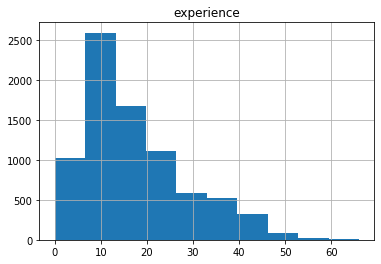

In [37]:
train.hist('experience')

In [38]:
y=train.groupby('experience')['Fees'].mean()
y

experience
0     145.932203
2     207.500000
3     198.680556
4     197.918239
5     231.092437
         ...    
60    100.000000
61    100.000000
64    100.000000
65     50.000000
66    100.000000
Name: Fees, Length: 64, dtype: float64

In [39]:
a=[1,2,3,4,5,6,7,8]
train['experience']=pd.cut(train.experience,bins=[0,3,8,14,26,36,45,50,66],labels=a,right=False)

In [40]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,4,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,3,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,3,Bangalore,0,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,3,Bangalore,0,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,4,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [41]:
train.isnull().sum()

Profile       0
Fees          0
experience    1
place         0
rating        0
MBBS          0
BDS           0
MD            0
MS            0
LCEH          0
DDVL          0
BAMS          0
BSAM          0
BHMS          0
DHMS          0
DNB           0
Get           0
dtype: int64

In [42]:
test=train.iloc[5962:,:]

In [43]:
train=train.iloc[:5961,:]

In [44]:
train.shape

(5961, 17)

In [45]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,4,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,3,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,3,Bangalore,0,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,3,Bangalore,0,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,4,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [46]:
train.place=train.place.astype('category')

test.place=test.place.astype('category')

In [47]:
train=pd.get_dummies(train)

In [48]:
test=pd.get_dummies(test)

In [49]:
del test['Fees']

In [50]:
df=train
df_label=df['Fees']
train , val = train_test_split(train,test_size=0.20,random_state=67)

In [51]:
train_label=train.Fees
val_label=val.Fees

In [52]:
del train['Fees']
del val['Fees']
del df['Fees']

In [53]:
def rmsle(predict,real):
    x=np.sqrt(np.mean(np.power((np.log10(real+1)-np.log10(predict+1)),2)))
    return(x,np.std(x))

In [54]:
def func(estimator,data,label,folds):
    score=cross_val_score(estimator,train,train_label,cv=folds, scoring='neg_mean_squared_error')
    rmse=np.sqrt(-score)
    return(rmse)

In [55]:
lr=LinearRegression()
score_lr=func(lr,df,df_label,10)

In [56]:
score_lr.mean()

230276968936.70737

In [57]:
lr.fit(df,df_label)
total=lr.predict(val)

In [58]:
rmsle_lr,std_lr=rmsle(total,val_label)
rmsle_lr,std_lr

(0.2815221017650935, 0.0)

In [59]:
sg=SGDRegressor(tol=1e-30)
score_sg=func(sg,df,df_label,10)
score_sg.mean()

171.48508917113128

In [60]:
sg.fit(train,train_label)
score=sg.predict(val)
rmsle_sg,std_sg=rmsle(score,val_label)
rmsle_sg,std_sg

(0.28569852774769033, 0.0)

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
score_dtr=func(dtr,df,df_label,10)
score_dtr.mean()

208.1373730713398

In [62]:
dtr.fit(train,train_label)
score=dtr.predict(val)
rmsle_dtr,std_dtr=rmsle(score,val_label)
rmsle_dtr,std_dtr

(0.3204289624078498, 0.0)

In [63]:
svm=SVR(kernel='rbf',gamma=0.05,C=70)
score_svm=func(svm,df,df_label,10)
score_svm.mean()

172.76400863231368

In [64]:
svm.fit(train,train_label)
score=svm.predict(val)
rmsle_svm,std_svm=rmsle(score,val_label)
rmsle_svm,std_svm

(0.27529757374727165, 0.0)

In [65]:
score_knn=[]
for k in range(30,70):
    knn=KNeighborsRegressor(k,algorithm='auto')
    score=func(knn,df,df_label,10)
    score=score.mean()
    score_knn.append(score)

In [66]:
pd.Series(score_knn,index=range(30,70)).sort_values()

58    172.267472
59    172.343909
64    172.356344
60    172.365540
61    172.405188
56    172.417434
51    172.433321
54    172.433843
57    172.442426
43    172.467727
48    172.489887
45    172.491052
55    172.492272
65    172.500878
67    172.524051
49    172.524562
50    172.526480
52    172.536070
46    172.542098
44    172.558468
62    172.560443
63    172.572662
53    172.594621
66    172.616257
42    172.617139
68    172.664761
40    172.697661
41    172.737314
69    172.744319
39    172.747382
47    172.817367
32    172.895223
36    173.009203
31    173.022576
37    173.060292
33    173.117878
38    173.128554
35    173.133599
34    173.151073
30    173.151211
dtype: float64

In [67]:
knn=KNeighborsRegressor(40,algorithm='auto')

score=func(knn,train,train_label,10)
score_knn=score.mean()
score_knn

172.69766060422597

In [68]:
knn.fit(train,train_label)
score=knn.predict(val)
rmsle_knn,std_knn=rmsle(score,val_label)
rmsle_knn,std_knn

(0.2809767880913025, 0.0)

In [69]:
xgb=xgboost.XGBRegressor()
score=func(xgb,df,df_label,10)
score_xg=score.mean()
score_xg

178.00443279460768

In [70]:
xgb.fit(train,train_label)
score=xgb.predict(val)
rmsle_xg,std_xg=rmsle(score,val_label)
rmsle_xg,std_xg

(0.2845598130650683, 0.0)